In [1]:
import pandas as pd

In [2]:
df =pd.read_csv("Placement.csv")

# Covariance

In [3]:
df.cov()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-58.106028,-40.413645,52.556168,8.102336,3.616177e+05
ssc_p,-52.641355,117.228377,60.348373,42.897137,37.659225,24.535952,2.877739e+04
hsc_p,-58.106028,60.348373,118.755706,34.819820,35.461678,22.555846,6.697772e+04
degree_p,-40.413645,42.897137,34.819820,54.151103,21.929469,17.272020,-1.173995e+04
etest_p,52.556168,37.659225,35.461678,21.929469,176.251018,16.886973,2.287876e+05
mba_p,8.102336,24.535952,22.555846,17.272020,16.886973,34.028376,9.624979e+04
salary,361617.668689,28777.386468,66977.716032,-11739.948520,228787.619507,96249.789024,8.734295e+09


1.Covariance between degree_p and etest_p:

The covariance between degree_p and etest_p is approximately 21.929469. This positive covariance indicates that degree_p and etest_p tend to vary together in the same direction.

2.Covariance between etest_p and mba_p:

The covariance between etest_p and mba_p is approximately 16.89.
This positive covariance indicates that as etest_p increases, mba_p tends to increase as well, showing a tendency for both variables to vary together in the same direction.

# Correlation

In [4]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


Correlation between mba_p and salary:

The correlation coefficient between mba_p and salary is approximately 0.175013.

This positive correlation suggests a slight tendency for higher MBA percentage (mba_p) to be associated with higher salaries (salary), indicating a weak relationship between the two variables.

# Normal Distrubuton

In [5]:
# Import necessary libraries
from matplotlib import pyplot
from scipy.stats import norm
import seaborn as sns

# Define the function to get the probability density function (PDF) probability
def get_pdf_probability(df, startrange, endrange):
    # Create a distribution plot of the data
    ax = sns.distplot(df, kde=True, kde_kws={'color': 'blue'}, color='Green')
    
    # Add vertical lines at the specified start and end range
    pyplot.axvline(startrange, color='Red')
    pyplot.axvline(endrange, color='Red')
    
    # Generate a sample from the dataframe
    sample = df
    
    # Calculate parameters: mean and standard deviation of the sample
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    
    # Define the normal distribution with the calculated mean and standard deviation
    dist = norm(sample_mean, sample_std)
    
    # Generate a list of values within the specified range
    values = []
    for value in range(startrange, endrange):
        values.append(value)
    
    # Calculate the PDF for each value in the range
   
    probabilites = []
    for value in range(startrange, endrange):
        probabilites.append(dist.pdf(value))
        
     
    
    # Sum the probabilities to get the area under the curve within the range
    prob = sum(probabilites)
    
    # Print the result
    print("The area between range({}, {}): {}".format(startrange, endrange, sum(probabilites)))
    
    # Return the calculated probability
    return prob

Mean=67.303, Standard Deviation=10.827
The area between range(40, 70): 0.5753110269235305


C:\Users\AB92922\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.5753110269235305

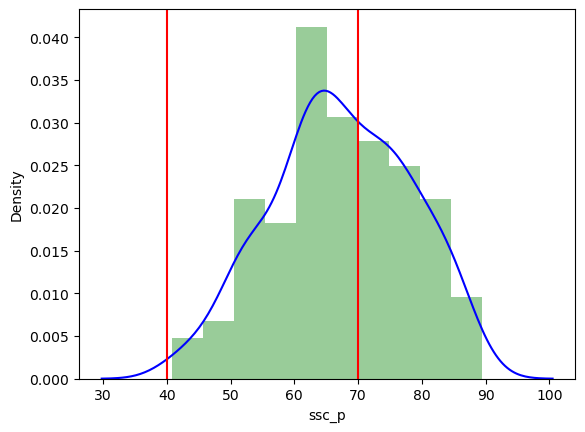

In [6]:
get_pdf_probability(df["ssc_p"], 40, 70)

# Standard_Normal_Distribution

In [7]:
# Function to plot a standardized normal distribution graph
def stdNBgraph(df):
    # Calculate mean and standard deviation of the input dataframe `df`
    mean = df.mean()
    std = df.std()
    
    # Create a list `values` containing each value from the dataframe `df`
    values = [i for i in df]
    
    # Calculate the z-score for each value in `values`
    z_score = [(j - mean) / std for j in values]
    
    # Plot the distribution of z-scores using seaborn
    import seaborn as sns
    sns.distplot(z_score, kde=True)
    
    # Calculate and print the mean of z-scores
    print(sum(z_score) / len(z_score))

9.26907129861468e-16


C:\Users\AB92922\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


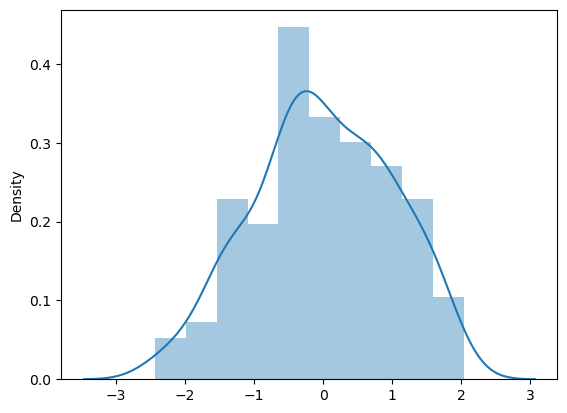

In [8]:
stdNBgraph(df["ssc_p"])

# T Test

In [32]:
from scipy.stats import ttest_ind


# Independent sample unpaired T-test
#diff group (M,F) , same condtion (salary)
#null hypothesis : there is no similariy between 10th passmark of male and 12th passmark of male

Others = df[df["hsc_b"]=='Central']['salary']
Central= df[df["hsc_b"]=='Others']['salary']
ttest_ind(Others, Central)

Ttest_indResult(statistic=-0.1684880697892395, pvalue=0.8663592108619098)

Since the p-value is much grater than the common significance level of 0.05 , we accept the null hypothesis. statistically significant no difference between the hsc_b cental and hsc_b others scores for Salary.

In [ ]:
female= df[df["gender"]=='F']['salary']

Since the p-value is much grater than the common significance level of 0.05 , we accept the null hypothesis. statistically significant no difference between the MBA scores and e-test scores for Commerce students.

In [10]:
#Dependent sample Ppaired T-test
#same group(hsc_s)-but diffent conditions(mba_p, etest_p)
#Null Hypothesis (Ho):There is no significant difference in the mean MBA scores (mba_p) and etest scores (etest_p) between students with a Commerce background.

Commerce_mba_p  = df[df["hsc_s"]=='Commerce']['mba_p']
Commerce_etest_p = df[df["hsc_s"]=='Commerce']['etest_p']
ttest_result = ttest_ind(Commerce_mba_p, Commerce_etest_p)

In [11]:


ttest_result = ttest_ind(Commerce_mba_p, Commerce_etest_p)

print("T-statistic:", ttest_result.statistic)
print("P-value:", ttest_result.pvalue)

T-statistic: -7.079422262550767
P-value: 1.844299454870846e-11


Since the p-value is much smaller than the common significance level of 0.05 , we reject the null hypothesis.
statistically significant difference between the MBA scores and e-test scores for Commerce students.

# VIF

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=df.fillna(0)

In [23]:
def QuanQual(df):
    quan=[]
    qual=[]
    for columnName in df.columns:
        
    #print col
        #print(columnName)
        if(df[columnName].dtype=='O'):
        #print qual
            #print("qual")
            qual.append(columnName)
        else:
        #print quan
            #print("quan")
            quan.append(columnName)
    return quan, qual

In [24]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [25]:
quan, qual =QuanQual(df)
print("Quantitive_variables:",quan)
print("Quantitive_variables:",qual)

Quantitive_variables: ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
Quantitive_variables: ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [26]:
# Calculate VIF for quantitative variables
vif_result = calc_vif(df[quan])
vif_result

,variables,VIF
0,sl_no,4.046145
1,ssc_p,76.789794
2,hsc_p,59.219135
3,degree_p,113.326503
4,etest_p,33.191651
5,mba_p,118.651958
6,salary,3.939976


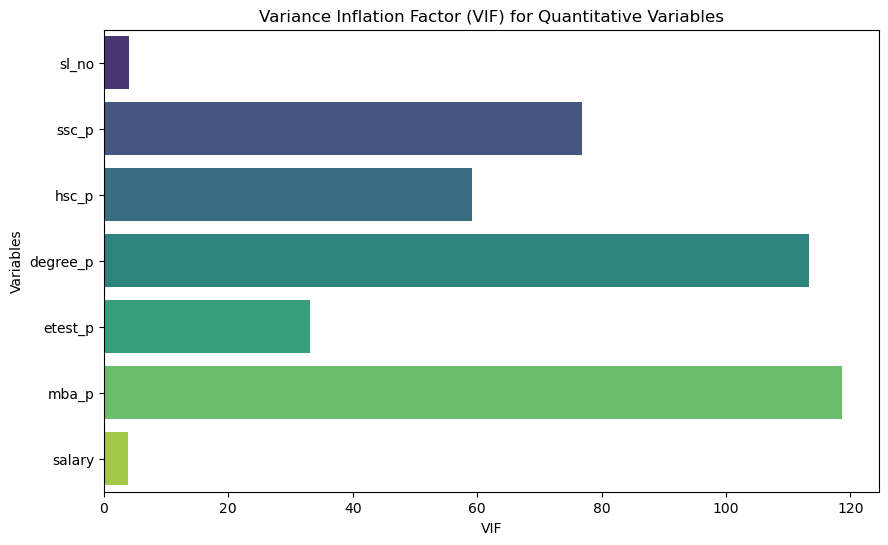

In [27]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='variables', data=vif_result, palette='viridis')

# Adding titles and labels
plt.title('Variance Inflation Factor (VIF) for Quantitative Variables')
plt.xlabel('VIF')
plt.ylabel('Variables')

# Show the plot
plt.show()

In [28]:
# Calculate VIF for quantitative variables
vif_result = calc_vif(df[["ssc_p","salary"]])
vif_result

,variables,VIF
0,ssc_p,3.248087
1,salary,3.248087


In [29]:
# Calculate VIF for quantitative variables
vif_result = calc_vif(df[["hsc_p","salary"]])
vif_result

,variables,VIF
0,hsc_p,3.116876
1,salary,3.116876


In [30]:
# Calculate VIF for quantitative variables
vif_result = calc_vif(df[["degree_p","salary"]])
vif_result

,variables,VIF
0,degree_p,2.940539
1,salary,2.940539


In [31]:
# Calculate VIF for quantitative variables
vif_result = calc_vif(df[["mba_p","salary"]])
vif_result

,variables,VIF
0,mba_p,2.707661
1,salary,2.707661


# Correlation matrix

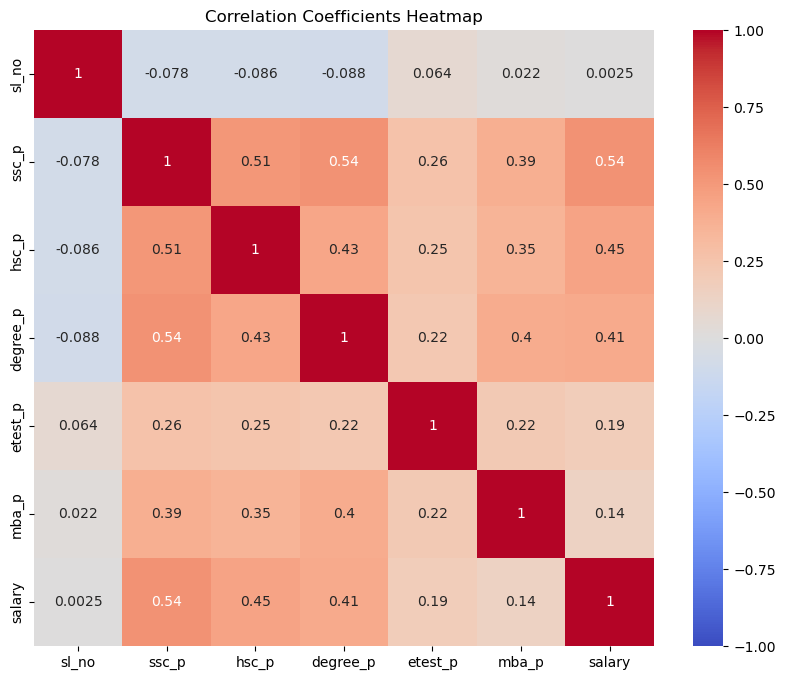

In [33]:
# Corrle

correlation_matrix = df.corr()

# Plot heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Coefficients Heatmap")
plt.show()

In [36]:
quan_df = df[quan] 

# Pearson Correlation Coefficients

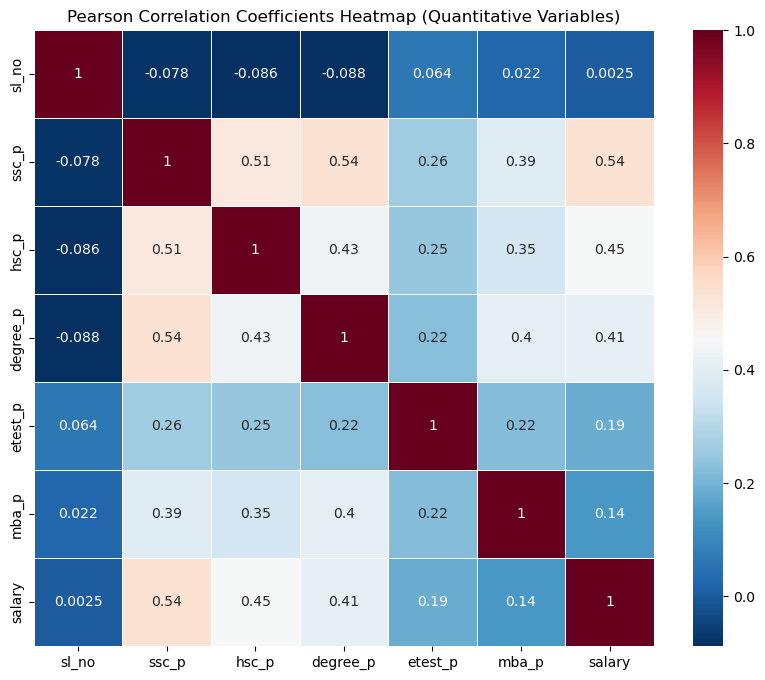

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'quan' is your DataFrame containing quantitative variables
# Calculate Pearson correlation coefficients
pearsoncorr = quan_df.corr(method='pearson')

# Plot heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',  # Color map
            annot=True,  # Show numeric annotations
            linewidth=0.5)  # Width of lines that divide each cell

plt.title('Pearson Correlation Coefficients Heatmap (Quantitative Variables)')
plt.show()


# One Way Anova

In [38]:
import scipy.stats as stats
stats.f_oneway(df['ssc_p'],df['hsc_p'],df['degree_p'])

F_onewayResult(statistic=0.6719700864663097, pvalue=0.5110602818995302)

Null Hypothesis (Ho): The scores (ssc_p, hsc_p, degree_p) have equal means.

Alternative Hypothesis (H1): The scores (ssc_p, hsc_p, degree_p) have at least one different mean.

Conclusion

Given the F-statistic of approximately 4.867 and a p-value of approximately 0.0081:

Since the p-value (0.0081) is less than the commonly used significance level (e.g., 0.05), we reject the null hypothesis.
Therefore, we have evidence to support the alternative hypothesis that at least one of the means of ssc_p, hsc_p, and degree_p is statistically different from the others.

# Two Way Anova

In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
# Define the model
model = ols('salary ~ ssc_p+hsc_p+degree_p+etest_p+mba_p+ssc_p*hsc_p*degree_p*etest_p*mba_p', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, type=2)

print(anova_table)


                                       df        sum_sq       mean_sq  \
ssc_p                                 1.0  1.484424e+12  1.484424e+12   
hsc_p                                 1.0  2.183866e+11  2.183866e+11   
degree_p                              1.0  4.916605e+10  4.916605e+10   
etest_p                               1.0  8.441267e+08  8.441267e+08   
mba_p                                 1.0  1.068091e+11  1.068091e+11   
ssc_p:hsc_p                           1.0  4.546760e+10  4.546760e+10   
ssc_p:degree_p                        1.0  2.160678e+10  2.160678e+10   
hsc_p:degree_p                        1.0  2.993640e+10  2.993640e+10   
ssc_p:hsc_p:degree_p                  1.0  1.409451e+10  1.409451e+10   
ssc_p:etest_p                         1.0  1.083158e+09  1.083158e+09   
hsc_p:etest_p                         1.0  1.403494e+09  1.403494e+09   
ssc_p:hsc_p:etest_p                   1.0  6.960875e+09  6.960875e+09   
degree_p:etest_p                      1.0  4.472229